## K-means clustering

K-means is an unsupervised machine learning algorithm used for clustering data into distinct groups (clusters) based on similarity. Here's how it works:

* Initialization: Specify the number of clusters, $𝑘$ and randomly initialize $𝑘$ cluster centroids.
* Assignment: Each data point is assigned to the cluster whose centroid is closest (based on distance metrics like Euclidean distance).
* Update: Compute the new centroids as the mean of all points assigned to each cluster.
* Repeat: Steps 2 and 3 are repeated until the centroids stabilize or a maximum number of iterations is reached.

<img src="k_means.png" alt="K means clustering" width="800">

[[-2.52676238 -3.07282891]
 [ 2.16078248  2.69078762]]


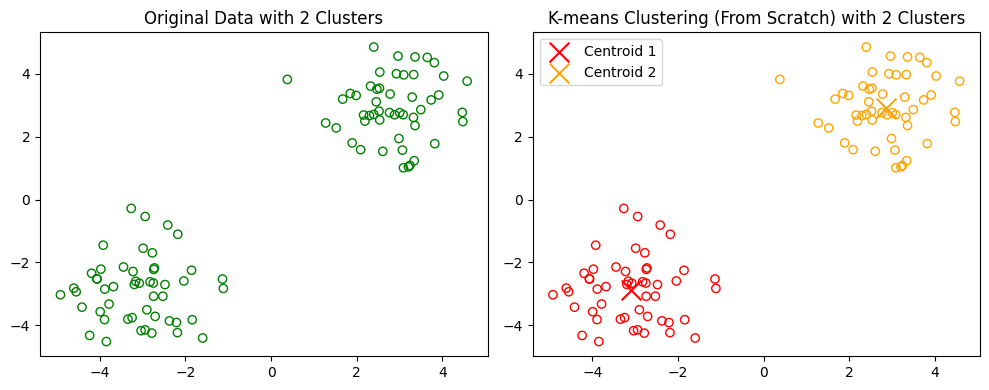

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 2D dataset
np.random.seed(42)
cluster_1 = np.random.randn(50, 2) + np.array([3, 3])  # Cluster 1
cluster_2 = np.random.randn(50, 2) + np.array([-3, -3])  # Cluster 2
data = np.vstack([cluster_1, cluster_2])




# K-means implementation from scratch
def kmeans(data, k, max_iters=100):
    # Randomly initialize k centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    
    for _ in range(max_iters):
        # Step 1: Assign data points to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Step 2: Calculate new centroids as the mean of assigned points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Step 3: Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

k = 2
centroids, labels = kmeans(data, k)

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the original data
axes[0].scatter(data[:, 0], data[:, 1], edgecolors='green', facecolors='none', marker='o')
axes[0].set_title("Original Data with 2 Clusters")

# Plot the K-means clustering result
cluster_1 = data[labels == 0]
cluster_2 = data[labels == 1]

# Plot the data points for cluster 1 (red)
axes[1].scatter(cluster_1[:, 0], cluster_1[:, 1], edgecolors='red', facecolors='none', marker='o')
# Plot the data points for cluster 2 (orange)
axes[1].scatter(cluster_2[:, 0], cluster_2[:, 1], edgecolors='orange', facecolors='none', marker='o')

# Plot the centroids with the same color as their corresponding group
axes[1].scatter(centroids[0, 0], centroids[0, 1], c='red', marker='x', s=200, label='Centroid 1')
axes[1].scatter(centroids[1, 0], centroids[1, 1], c='orange', marker='x', s=200, label='Centroid 2')

# Set the title and legend
axes[1].set_title("K-means Clustering (From Scratch) with 2 Clusters")
axes[1].legend()

plt.tight_layout()
plt.show()